<h1> LightGBM 개요 </h1>  

XGBoost가 많이 알려지고 많이 사용된 이후에 마이크로소프트에서 좀더 강화해서 만든 것임.(단점등 기능들을 개선)  
대표적으로는 XGBoost 대비 더 빠른 학습, 더 적은 메모리 사용. 병렬을 시키면 XGBoost가 더 빠르다는 말도 있기도 함.  


![LightGBM](img/lightGBM.png)


<h1> LightGBM 트리 분할 방식 - 리프 중심 </h1>  

기본적으로 XGBoost를 포함한 GBM 계열은 균형잡힌 트리를 만든다. depth를 최소화하기 위함임. depth가 길어지면 한쪽 노드 방향으로 계속 생기다보면 균형 트리 분할(Level Wise)는 오버피팅 될 가능성이 있다는 이론이 있어서 그렇다.  

리프 중심 트리 분할(Leaf Wise)는 그렇지 않다. 분할을 할 때 예측 오류를 가장 줄여줄 수 있는 분명한 방향성이 있는 노드에 리프 노드를 계속 생성하면 좀 더 정확한 결과를 내 줄 수 있겠다는 방향성을 가지고 한다면 오류를 줄여줄 수 있다. 그렇기 때문에 리프 중심으로 트리를 분할해도 더 향상된 예측이 가능하다는 것이 LightGBM의 주장.

![LightGBMtree](img/lightGBMtree.png)


<h1> LightGBM 파이썬 구현 </h1>  

XGBoost와 동일하다. 마이크로소프트가 이런 오픈소스쪽에 훌륭한 모델들을 제공하는 방향성이 많이 좋아짐.  


![PyLightGBM](img/PylightGBMtree.png)


<h1> LightGBM 하이퍼 파라미터 </h1> 

트리 기반의 앙상블 메소드들은 하이퍼 파라미터가 되게 많다.  
그런데 이게 파이썬 래퍼로 된 모듈, 사이킷런 래퍼로 된 모듈이 따로 있기 때문에 더 헷갈림.  
그래서 규칙이 뭐냐면  
만약에 LightGBM 사이킷런 래퍼가 XGBoost보다 늦게 나왔으니까 만약에 XGBoost 사이킷런 래퍼에 기능과 같은게 있으면 그대로 사용 됨.  
그렇지 않으면 파이썬 래퍼 LightGBM 하이퍼 파라미터를 사용.

![warpperParam1](img/warpperParam1.png)
![warpperParam2](img/warpperParam2.png)

<h1> 파이썬 래퍼와 사이킷런 래퍼 하이퍼 파라미터 비교</h1>  

기준은 뭐냐. 일단 LightGBM이 나중에 만들어졌으니까 사이킷런 래퍼 XGBoost로 기준을 따라간다. 동일한게 있으면 LightGBM으로 간다.

사이킷런 래퍼 XGBoost도 사실 사이킷런의 GBM 클래시파이어에 있는 하이퍼 파라미터를 가져왔으니까 그렇게 이해하면 편함.

![warpperParam3](img/warpperParam3.png)


In [1]:
import lightgbm

print(lightgbm.__version__)

3.0.0


### LightGBM 적용 – 위스콘신 Breast Cancer Prediction

In [2]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data　#feature　데이터셋
target = dataset.targets


# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. (n_estimators는 약한 학습기를 말함)
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]#eval 셋은 검증 데이터이기 때문에 테스트 데이터셋을 쓰면 안된다 원래는. 오버피팅 될 수 밖에 없다.
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [4]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9905


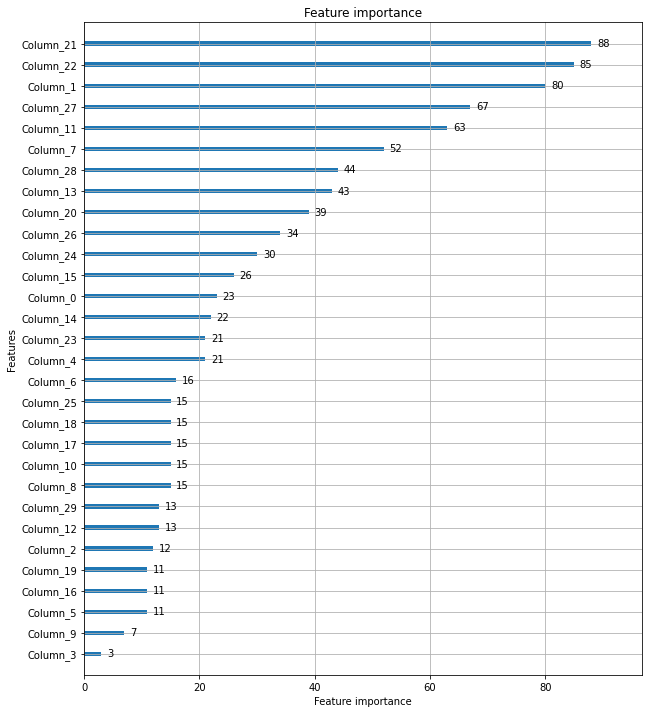

In [5]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(lgbm_wrapper, ax=ax)

In [6]:
print(dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
